In [1]:
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from gensim.models import TfidfModel
from gensim.corpora import Dictionary
from gensim.models import ldamodel
from gensim.models.coherencemodel import CoherenceModel
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
from nltk.util import ngrams
import numpy as np

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
DF = pd.read_csv("C:/Users/giulia macis/Desktop/UBISOFT/goodvideogames/youtube_comments_438Kjx7m6Uc.csv")
DF

,URL,title,releaseDate,author,comment,publishedTimeText,replyCount,voteCount
0,https://www.youtube.com/watch?v=438Kjx7m6Uc,Alan Wake 2 - Before You Buy,2023-10-26T21:11:13Z,@624Eduardo,A puro soyero le gusto esa chingadera,2024-11-04T00:32:12Z,0,0
1,https://www.youtube.com/watch?v=438Kjx7m6Uc,Alan Wake 2 - Before You Buy,2023-10-26T21:11:13Z,@KimsLantern,I haven’t completed the game yet but I just st...,2024-10-31T15:12:56Z,0,0
2,https://www.youtube.com/watch?v=438Kjx7m6Uc,Alan Wake 2 - Before You Buy,2023-10-26T21:11:13Z,@Cole-ft4rr,I’m glad I held out for a physical release!,2024-10-29T01:10:58Z,0,0
3,https://www.youtube.com/watch?v=438Kjx7m6Uc,Alan Wake 2 - Before You Buy,2023-10-26T21:11:13Z,@Skateandcreate9,Most confusing game of all time and I’ve playe...,2024-10-24T02:47:23Z,0,1
4,https://www.youtube.com/watch?v=438Kjx7m6Uc,Alan Wake 2 - Before You Buy,2023-10-26T21:11:13Z,@highfived,Is this a hard game to play ?,2024-10-21T23:05:54Z,2,0
...,...,...,...,...,...,...,...,...
1436,https://www.youtube.com/watch?v=438Kjx7m6Uc,Alan Wake 2 - Before You Buy,2023-10-26T21:11:13Z,@pilotwall,"Hello, Jake!!",2023-10-26T21:11:30Z,1,0
1437,https://www.youtube.com/watch?v=438Kjx7m6Uc,Alan Wake 2 - Before You Buy,2023-10-26T21:11:13Z,@Caydentheone,W,2023-10-26T21:11:29Z,0,0
1438,https://www.youtube.com/watch?v=438Kjx7m6Uc,Alan Wake 2 - Before You Buy,2023-10-26T21:11:13Z,@Fancypants8172,Hi,2023-10-26T21:11:30Z,1,2
1439,https://www.youtube.com/watch?v=438Kjx7m6Uc,Alan Wake 2 - Before You Buy,2023-10-26T21:11:13Z,@Rmly,oh,2023-10-26T21:11:28Z,0,2


In [3]:
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.update([
    'take', 'studio', 'got', 'people', 'get', 'best offer',
    'IGN','ig n', 'make', 'made', 'even', 'never', 'always', 'playing', 'online', 
    'feel', 'play', 'im', 'com', 'net', 'org', 'io', 'govedume', 'need', 
    'finish', 'time', 'Mr', 'St', 'Mrs', 'Ms', 'Dr', 'play', 'really', 
    'just', 'dont', 'think', 'know', 'much', 'watching', 'well', 'actually', 
    'its', 'literally', 'basically', 'probably', 'kinda', 'sorta', 
    'definitely', 'obviously', 'youre', 'theyre', 'dont', 'cant', 'wont', 
    'couldve', 'shouldve', 'didnt', 'aint', 'gameplay', 'controls', 
    'levels', 'update', 'patch', 'dev', 'continue', 'way','score','video','review'
])
new_stopwords = set(stopwords.words('english'))
new_stopwords.update([
    'good', 'like', 'concord', 'take', 'studio', 'got', 'people', 'get', 'best offer',
    'IGN','ign', 'make', 'made', 'even', 'never', 'always', 'playing', 'online', 
    'feel', 'play', 'im', 'com', 'net', 'org', 'io', 'govedume', 'need', 
    'finish', 'time', 'Mr', 'St', 'Mrs', 'Ms', 'Dr', 'play', 'really', 
    'just', 'dont', 'think', 'know', 'much', 'watching', 'well', 'actually', 
    'its', 'literally', 'basically', 'probably', 'kinda', 'sorta', 
    'definitely', 'obviously', 'youre', 'theyre', 'dont', 'cant', 'wont', 
    'couldve', 'shouldve', 'didnt', 'aint', 'gameplay', 'controls', 
    'levels', 'update', 'patch', 'dev', 'continue', 'way','score',"game", "alan"
    
])
lmtzr = WordNetLemmatizer()

In [4]:
# Define reusable functions

def preprocess_text(text):
    """Preprocess text by lowercasing, removing punctuation, tokenizing, and filtering stopwords."""
    if not isinstance(text, str):
        return ""
    tokens = word_tokenize(text.lower().translate(str.maketrans('', '', string.punctuation)))
    tokens = [lmtzr.lemmatize(word) for word in tokens if word not in custom_stopwords and len(word) >= 3]
    return ' '.join(tokens)

def get_sentiment(text):
    """Classify sentiment of text as positive, negative, or neutral."""
    score = analyzer.polarity_scores(text)
    negative_words = ["suck", "sucks", "done", "worst", "hate", "disappointed", "disgusted","shit","dog shit", ]
    if any(word in text.lower() for word in negative_words):
        return 'negative'
    elif score['compound'] >= 0.01:
        return 'positive'
    elif score['compound'] <= -0.01:
        return 'negative'
    else:
        return 'neutral'

def text_processing(texts):
    """Further clean and tokenize text for topic modeling."""
    texts = [re.sub("[^a-zA-Z]+", " ", str(text)) for text in texts]
    texts = [[word for word in text.lower().split()] for text in texts]
    texts = [[lmtzr.lemmatize(word) for word in text if word not in new_stopwords and len(word) >= 3] for text in texts]
    return texts

def bigram_analysis(comments, top_n=30):
    """Generate bigrams from tokenized comments and plot the frequency distribution."""
    all_tokens = [word_tokenize(comment) for comment in comments]
    all_ngrams = [ngram for tokens in all_tokens for ngram in ngrams(tokens, 2)]
    freq_dist_ngrams = FreqDist(all_ngrams)
    
    # Convert to DataFrame and sort
    df_ngrams = pd.DataFrame(list(freq_dist_ngrams.items()), columns=['n-gram', 'frequency'])
    df_ngrams = df_ngrams.sort_values(by='frequency', ascending=False)
    
    # Plot top n bigrams
    plt.figure(figsize=(12, 6))
    plt.bar(
        df_ngrams['n-gram'][:top_n].apply(lambda x: ' '.join(x)),  
        df_ngrams['frequency'][:top_n]
    )
    plt.title(f'Top {top_n} Bigram Frequency Distribution')
    plt.xlabel('Bigrams')
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.show()
    
    return df_ngrams


In [5]:
# Convert to datetime and extract only the date part
DF['releaseDate'] = pd.to_datetime(DF['releaseDate'].astype(str).str.replace('Z', '')).dt.date
DF['publishedTimeText'] = pd.to_datetime(DF['publishedTimeText'].astype(str).str.replace('Z', '')).dt.date

# Define the one-week period after the release date
release_date = DF['releaseDate'][0]
one_week_after_release = release_date + pd.DateOffset(weeks=1)
one_week_after_release = one_week_after_release.date()  # Convert to date format

# Filter for comments within the first week after the release date
df = DF[(DF['publishedTimeText'] >= release_date) & (DF['publishedTimeText'] <= one_week_after_release)]

# Select relevant columns and preprocess comments
df = df[['publishedTimeText', 'comment']]
df['processed_comments'] = df['comment'].apply(preprocess_text)

# Display the filtered DataFrame
df


,publishedTimeText,comment,processed_comments
250,2023-11-02,just get some balls and say yes you should pla...,ball say yes first alan wake first
251,2023-11-02,Do I have to know or play the 1st game to unde...,1st game understand one cause heard first play...
252,2023-11-02,This game was atrocious. You just lost all cr...,game atrocious lost credibility
253,2023-11-02,No Robocop try before you buy?? 🤷‍♂,robocop try buy 🤷‍♂
254,2023-11-02,I really am enjoying the game a couple hours i...,enjoying game couple hour enjoying acting dial...
...,...,...,...
1436,2023-10-26,"Hello, Jake!!",hello jake
1437,2023-10-26,W,
1438,2023-10-26,Hi,
1439,2023-10-26,oh,


In [6]:
# Randomly sample 500 rows with a fixed random_state for reproducibility
df = df.sample(n=500, random_state=2).reset_index(drop=True)  # Use any integer as the random_state

In [7]:
# Sentiment Analysis
analyzer = SentimentIntensityAnalyzer()
df['sentiment'] = df['processed_comments'].apply(get_sentiment)
most_common_sentiment = df['sentiment'].value_counts().idxmax()
print(f'The video has mostly {most_common_sentiment} comments.')
df

The video has mostly positive comments.


,publishedTimeText,comment,processed_comments,sentiment
0,2023-10-27,So very excited for this game. Loved all of th...,excited game loved remedy game control would g...,positive
1,2023-10-27,But who do you play more and who does the stor...,story focus,neutral
2,2023-10-26,Good to know this game makes you feel like Ala...,good game make like alan wake,positive
3,2023-10-26,The 3rd POV is honestly the best way to play ....,3rd pov honestly best nothing able change fact...,positive
4,2023-10-26,So excited about this game. Can’t wait to play...,excited game wait it—good hear suck,negative
...,...,...,...,...
495,2023-10-26,Since it's stuck on the EGS i'm never going to...,since stuck egs going,negative
496,2023-10-26,First,first,neutral
497,2023-10-26,Do I need to play the first one first bruv?,first one first bruv,neutral
498,2023-11-01,What part of the game are you referring to whe...,part game referring brought ashtray maze,neutral


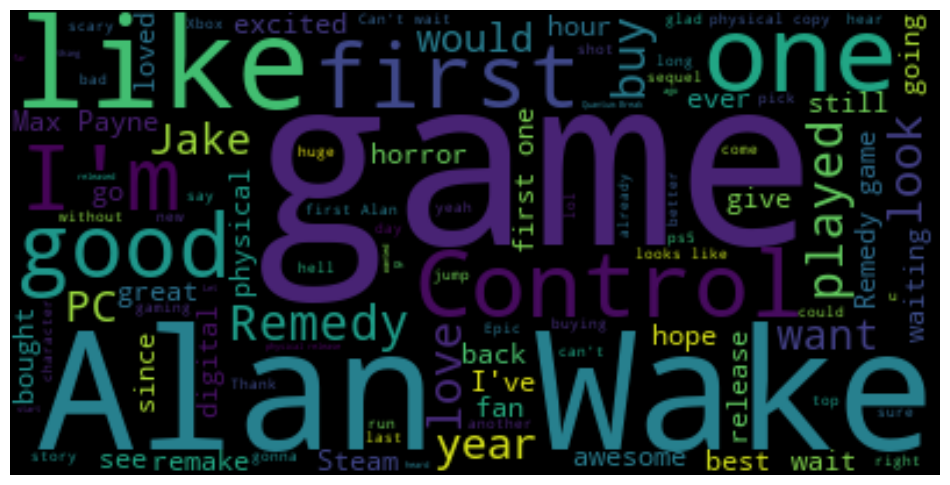

In [8]:
# WordCloud Visualization
word_cloud_text = ' '.join(df['comment'].dropna())
wordcloud = WordCloud(max_words=100, stopwords=custom_stopwords, random_state=1).generate(word_cloud_text)
plt.figure(figsize=(12, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

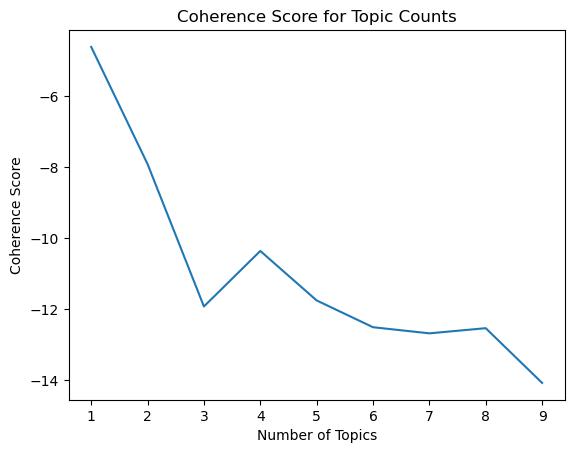

In [9]:
# Topic Modeling
data = text_processing(df['processed_comments'].values.tolist())
dictionary = Dictionary(data)
corpus = [dictionary.doc2bow(text) for text in data]
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

# Coherence Analysis for Topic Modeling
np.random.seed(1)
k_range = range(1, 10)
scores = []
for k in k_range:
    lda_model = ldamodel.LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=k, passes=20)
    cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary, coherence='u_mass')
    scores.append(cm.get_coherence())

plt.figure()
plt.plot(k_range, scores)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score for Topic Counts")
plt.show()


In [10]:
# Final LDA Model with Optimal Number of Topics
optimal_k = 4
model = ldamodel.LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=optimal_k, passes=20)
print(model.show_topics())

[(0, '0.011*"wake" + 0.009*"first" + 0.008*"awesome" + 0.007*"one" + 0.005*"break" + 0.005*"quantum" + 0.004*"preordered" + 0.004*"wait" + 0.004*"great" + 0.004*"love"'), (1, '0.011*"buy" + 0.011*"physical" + 0.006*"release" + 0.006*"remedy" + 0.005*"copy" + 0.004*"wake" + 0.004*"going" + 0.004*"best" + 0.004*"digital" + 0.004*"wanted"'), (2, '0.005*"waiting" + 0.005*"bought" + 0.005*"remake" + 0.005*"first" + 0.005*"look" + 0.004*"one" + 0.004*"wake" + 0.004*"excited" + 0.004*"evil" + 0.004*"maze"'), (3, '0.006*"control" + 0.005*"want" + 0.005*"wake" + 0.005*"love" + 0.004*"damn" + 0.004*"looking" + 0.004*"first" + 0.004*"payne" + 0.004*"max" + 0.004*"give"')]


The line becomes decreasing steadily after 4 topics, so 4 topics strikes a good balance.

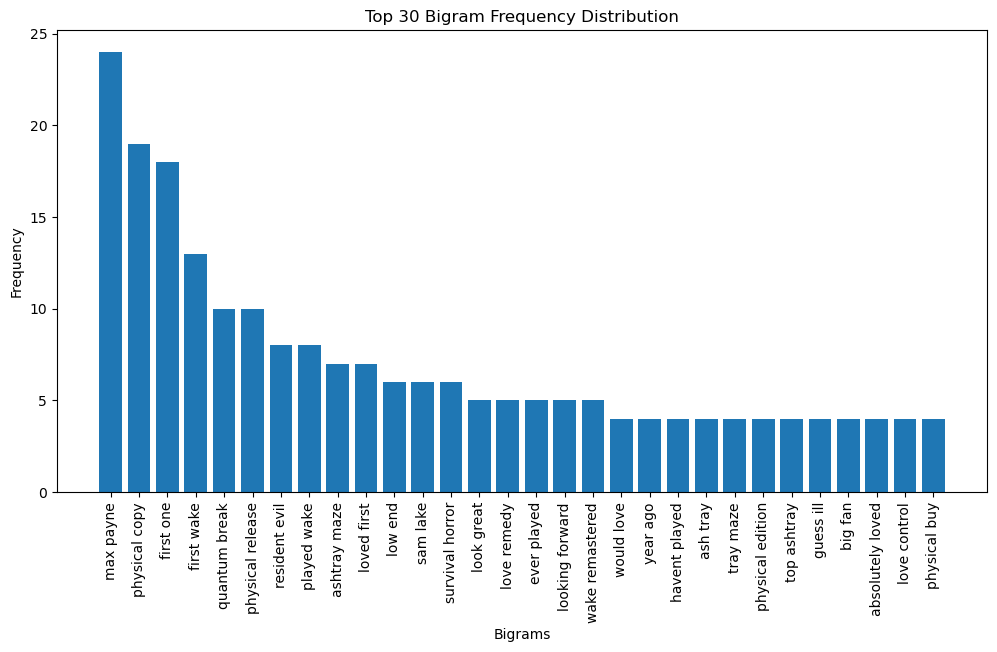

In [12]:
data_as_strings = [' '.join(tokens) for tokens in data]
df_ngrams = bigram_analysis(data_as_strings)

In [13]:
#Load the existing df_topics CSV file
title=DF['title'].unique()
file_path = r'C:/Users/giulia macis/Desktop/UBISOFT/df_good_topics.csv'
df_good_topics = pd.read_csv(file_path)
#Append the new row to the DataFrame
new_row = pd.DataFrame({'title': title, 'num_topics': optimal_k})
df_good_topics = pd.concat([df_good_topics, new_row], ignore_index=True)
#Save the updated DataFrame back to the CSV file
df_good_topics.to_csv(file_path, index=False)
df_good_topics

,title,num_topics
0,GTA 5 - Review,3
1,Space Marine 2 - Before You Buy,5
2,Alan Wake 2 - Before You Buy,4
